# BioImage Visualization in Python
Python has a rich selection of [data visualization](https://pyviz.org/index.html) tools that cover wide range of applications, for example
Matplotlib (Hunter, 2007), Mayavi (Ramachandran & Varoquaux, 2011), [ipyvolume](https://github.com/maartenbreddels/ipyvolume/), the yt Project
(Turk et al., 2010), [ITK](https://itk.org/) (Johnson, McCormick, Ibanez 2015), and more recently [napari](http://napari.org).

For **bioimage visulization** some major challenges are: 
- working with large and complex images: image size and dimensionality
- manual interactivity: for human in the loop annotation
- interactive analysis: for interactive parameter tuning and quality control

This lesson will introduce `napari` a fast, interactive, multi-dimensional image viewer for Python.

## Introducing napari <img src="resources/napari-logo.png" width=100 style="float:right">


`napari` is a fast, interactive, multi-dimensional image viewer for Python. It’s designed for browsing, annotating, and analyzing large multi-dimensional images. It’s built on top of Qt (for the GUI), vispy (for performant GPU-based rendering), and the scientific Python stack (numpy, scipy).

`napari` includes critical viewer features out-of-the-box, such as support for large multi-dimensional data, layering, and annotation. By integrating closely with the Python ecosystem, napari can be easily coupled to leading machine learning and image analysis tools (e.g. scikit-image, scikit-learn, PyTorch), enabling more user-friendly automated analysis.

<img src="resources/napari-layer-types.png" width=150 style="float:right">

`napari` supports six main different layer types, **Image**, **Labels**, **Points**, **Vectors**, **Shapes**, and **Surface**, each corresponding to a different data type, visualization, and interactivity. You can add multiple layers of different types into the viewer and then start working with them, adjusting their properties.

`napari` also supports bidirectional communication between the viewer and the Python kernel, which is especially useful when launching from jupyter notebooks or when using our built-in console. Using the console allows you to interactively load and save data from the viewer and control all the features of the viewer programmatically.

You can extend `napari` using custom shortcuts, key bindings, mouse functions, and our new **plugin-interface**.

Learn more about napari at [napari.org](https://napari.org/), including our [tutorials](https://napari.org/tutorials/), our [documentation](https://napari.org/docs/) and our [mission and values](https://napari.org/docs/developers/MISSION_AND_VALUES.html).

## Vizualing data with napari

napari uses Qt for Graphical User Interface (GUI), and when using napari in a jupyter notebook or interactive IPython session, you must first create the Qt application using `%gui qt`. If using napari in a python script you can create the Qt application inside a context using `with napari.gui_qt():`.

In [2]:
%gui qt

Now that we've created our GUI app, we can import napari and display an empty viewer

In [3]:
import napari
viewer = napari.Viewer()

Hopfully when you ran the above command a new empty napari viewer appeared in a seperate window.

Note that unlike other jupyter widgets napari is not embedded inside the jupyter notebook. This is because napari uses Qt which is hard to embed.

We can however take a screenshot of the current state of napari viewer and embed that in the notebook. This can be useful for teaching or sharing purposes where you might want to share a static version of the notebook with embedded screenshots so someone else can quickly see what you were looking at when you made the notebook. Note that unlike the real napari viewer, these screenshots won't be interactive!

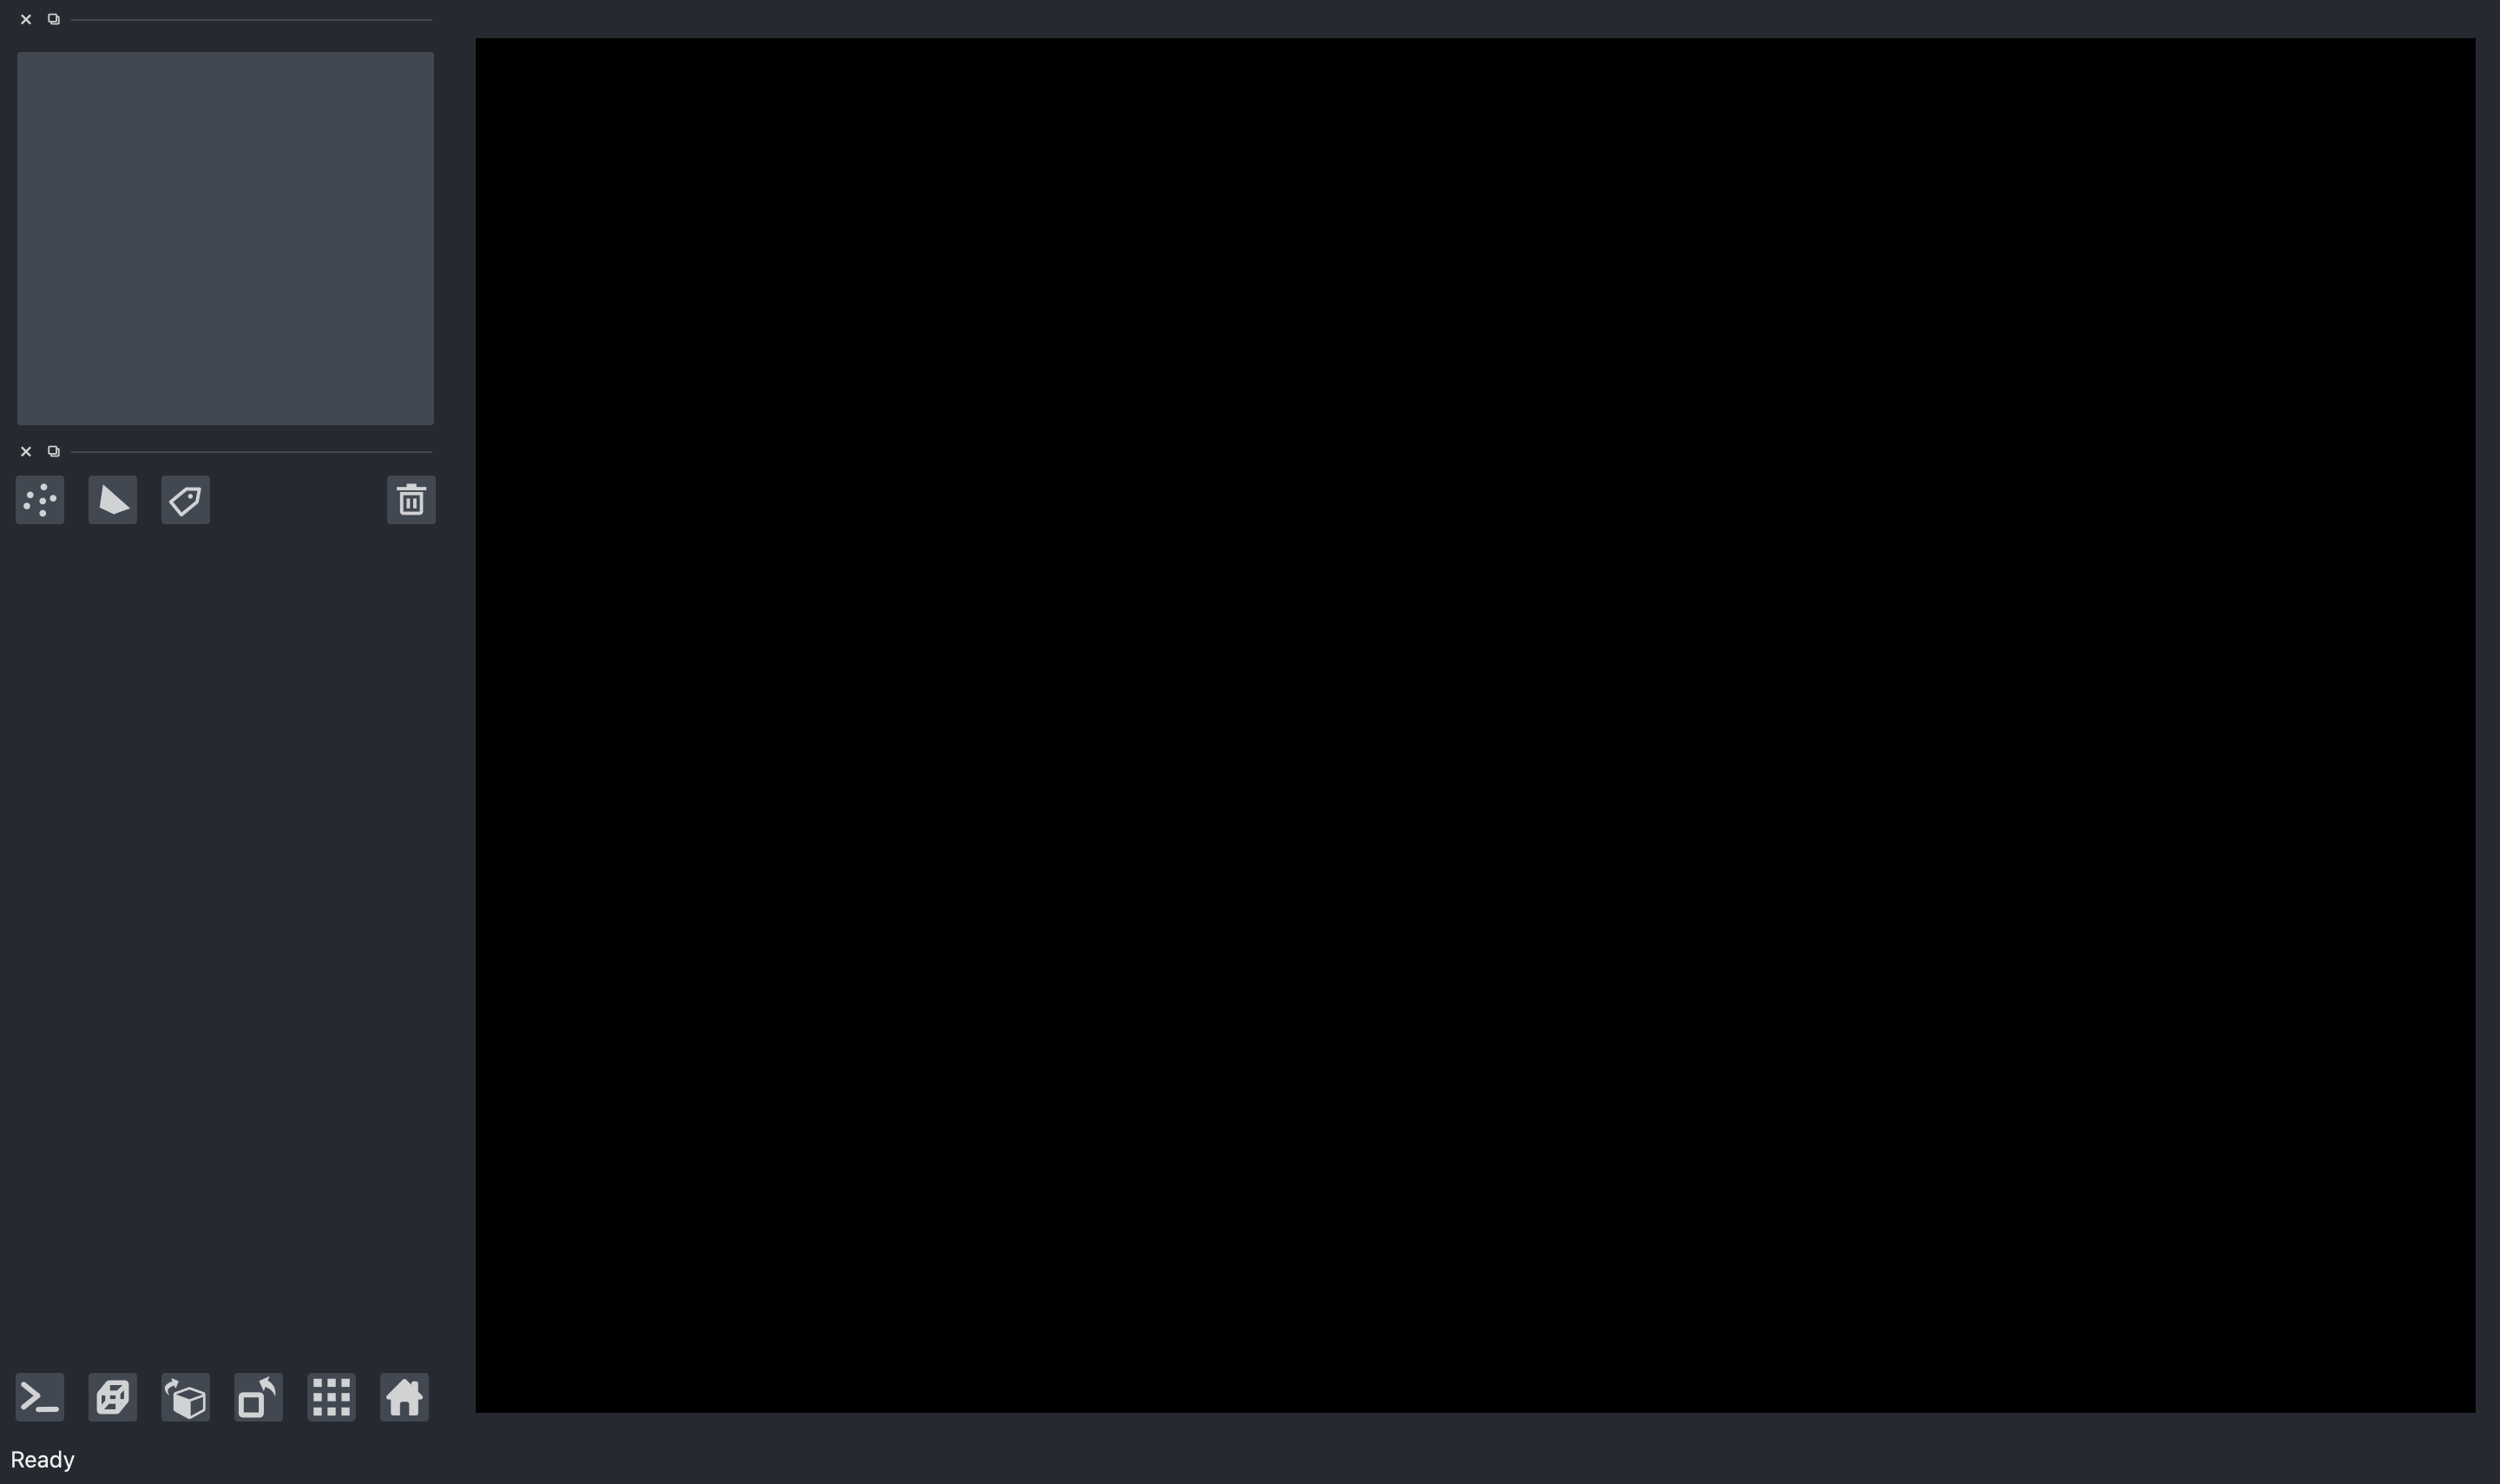

In [17]:
from napari.utils import nbscreenshot

nbscreenshot(viewer)

### Seeing our first image

There are a couple of main ways to load images to into the viewer

- By `dragging and dropping` image files onto the viewer
- By selection image files from the `Open File(s)` menu option
- Using the `viewer.open` command with a file path from within the notebook
- Loading the image data into an array and then passing that array using the `viewer.add_image` command

For the first three options the file path will get passed through our fileIO plugin interface, allowing you to easily leverage highly customized fileIO plugins for your diverse needs. The fourth option allows you complete control over loading and visualization and is most suited for when you have data already loaded into your notebook from other analyses.

Here we will explore the fourth option, explicitly loading a 3D image using the `tifffile` library.

In [13]:
from tifffile import imread

# load the image data and inspect its shape
cells = imread('data/cells.tif')
print(cells.shape)

(60, 256, 256)


Now that we have the data array loaded, we can directly add it to the viewer.

In [18]:
# directly add the image data to the napari viewer
viewer.add_image(cells)

<Image layer 'cells' at 0x61da22510>

Don't forget to change windows so you can now see the viewer. By default you'll just be looking at the 1st plane of the 3D data, which is the 0th slice of 60. You should see a single slider at the buttom of the viewer that will allow you to scroll through the rest of the z-stack. If you find the 30th slice then you should see the same as in the screenshot below.

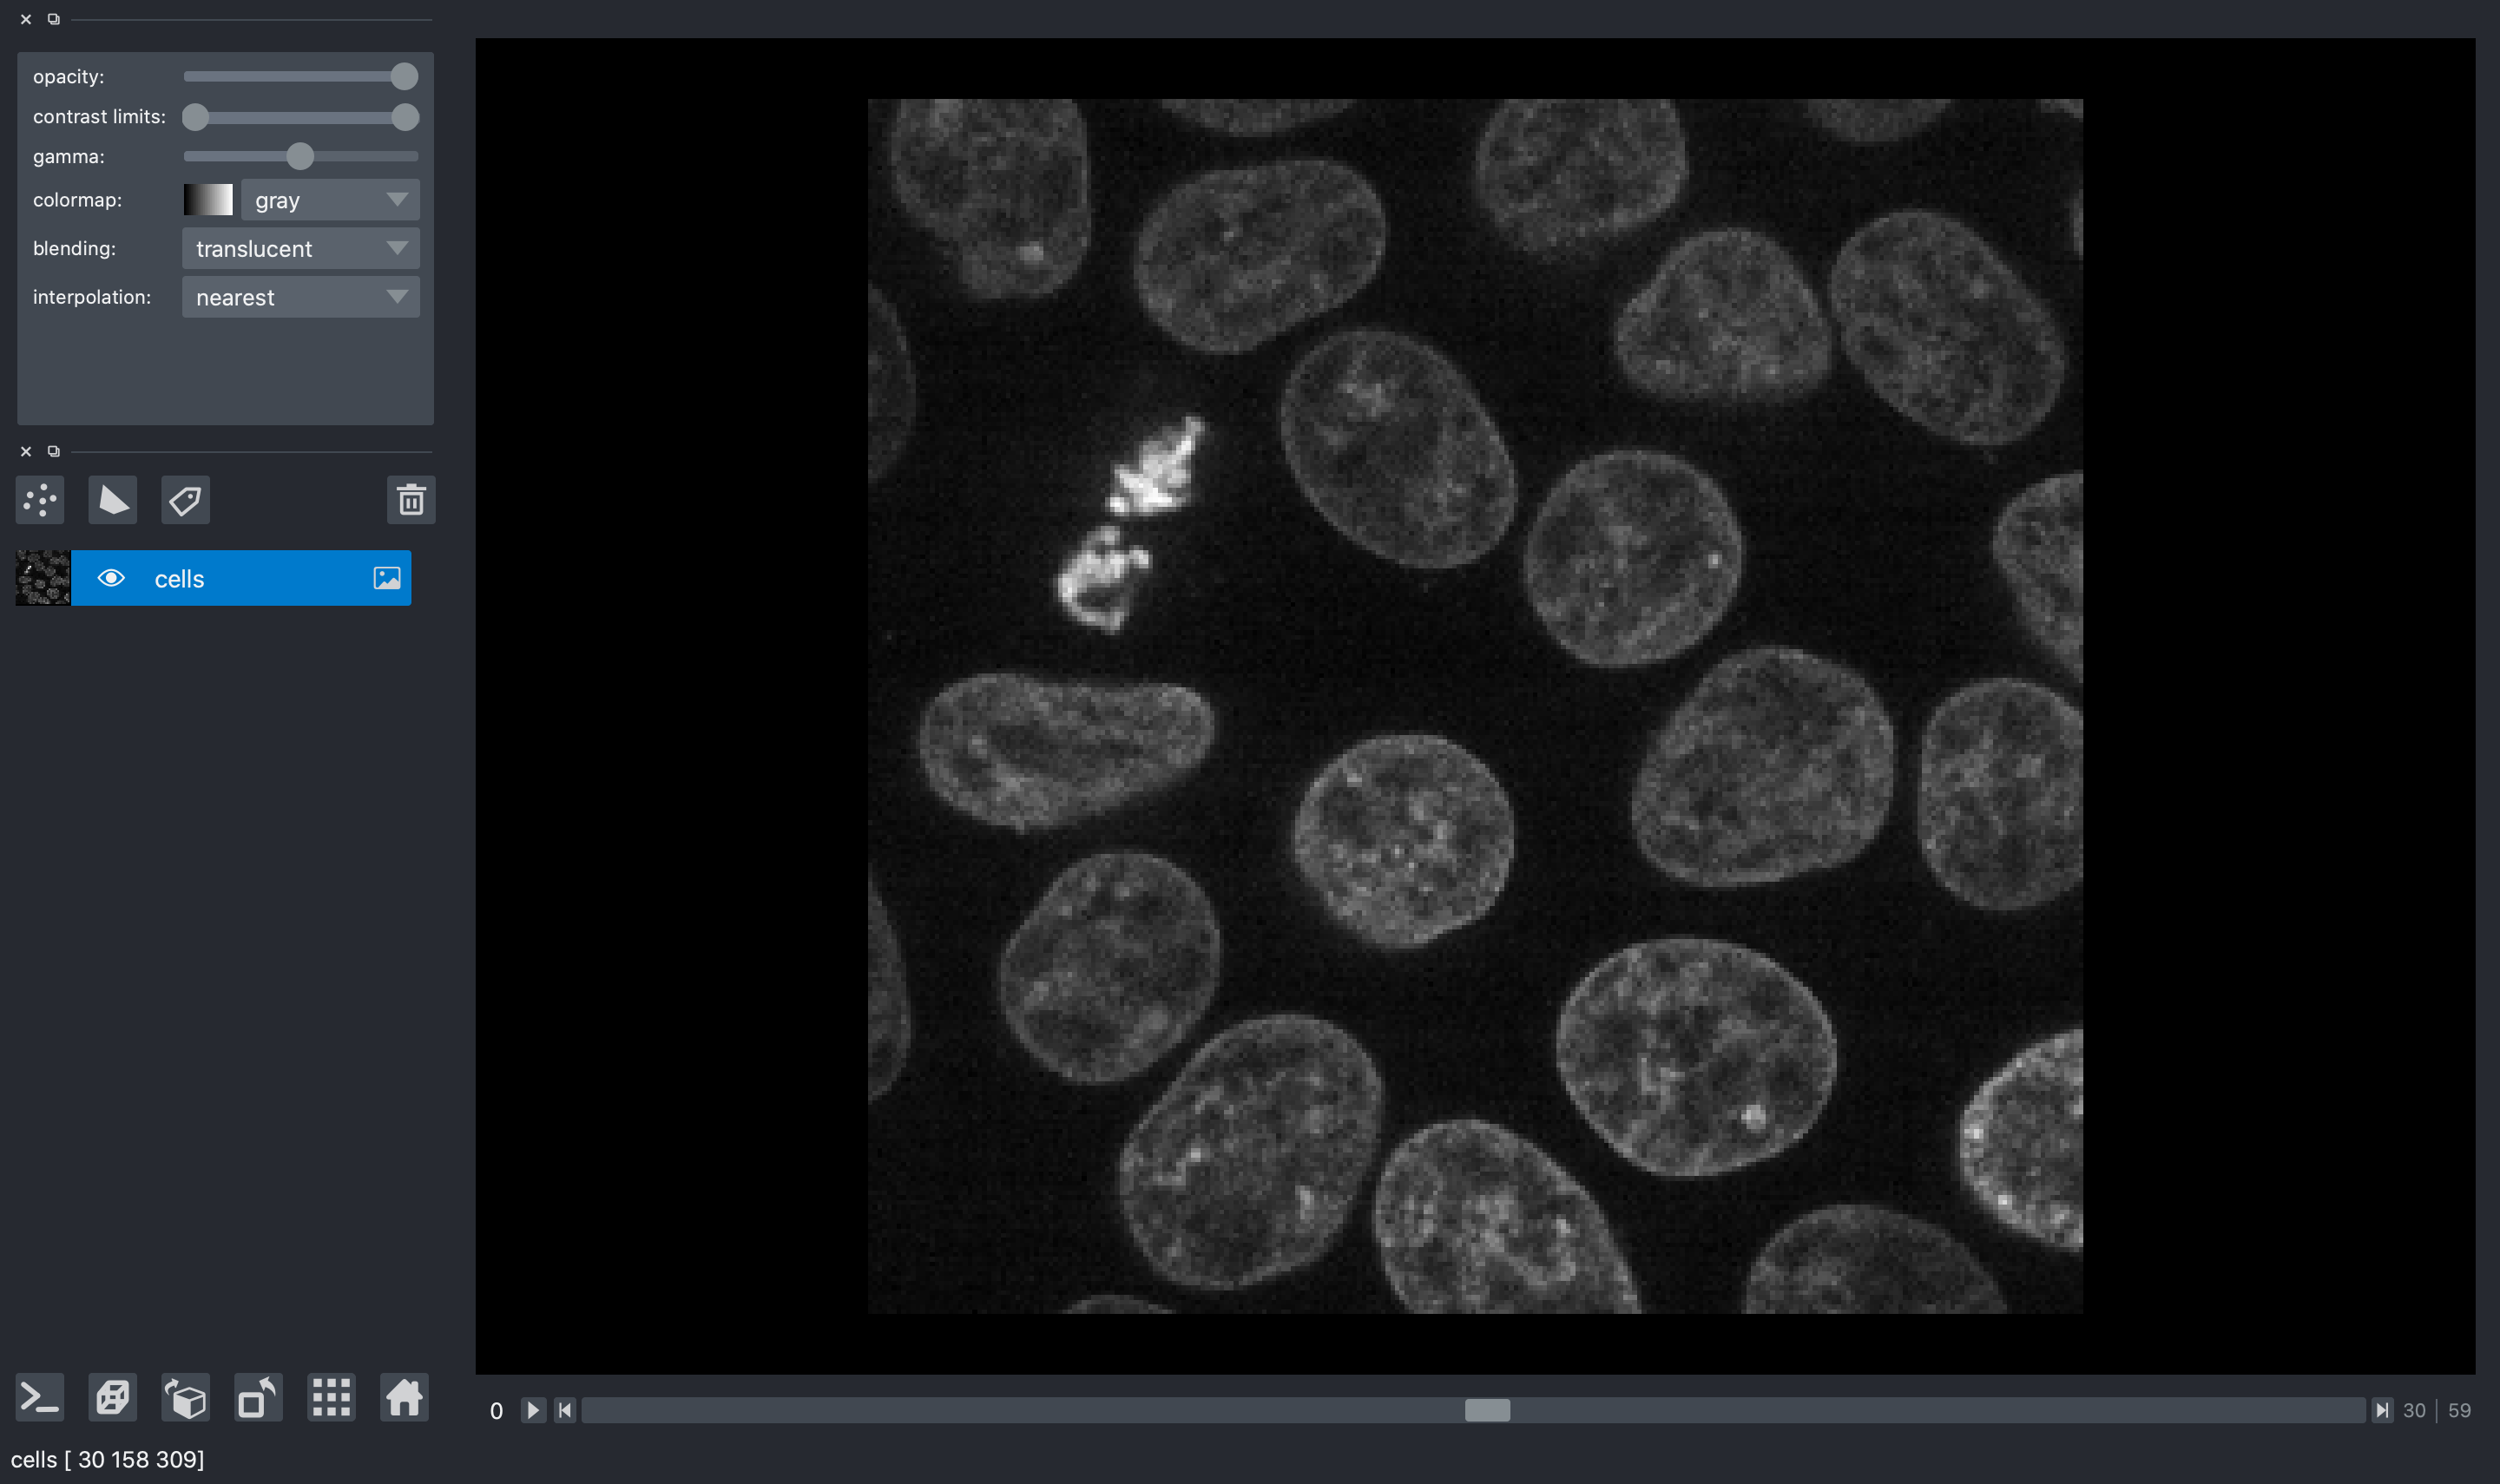

In [19]:
nbscreenshot(viewer)

In the top left hand corner of the viewer we now have a control panel with controls that cover all our layers, and those that are specific to images, inculding **opacity**, **contrast limits**, and **colormap**. Right clicking on the **contrast limits** slider pulls up an elongated version of the slider which you can type specific numbers into. Let's give that a try to adjust the contrast limits to `[0.07, 0.35]`, and let's change the colormap to `blue`.

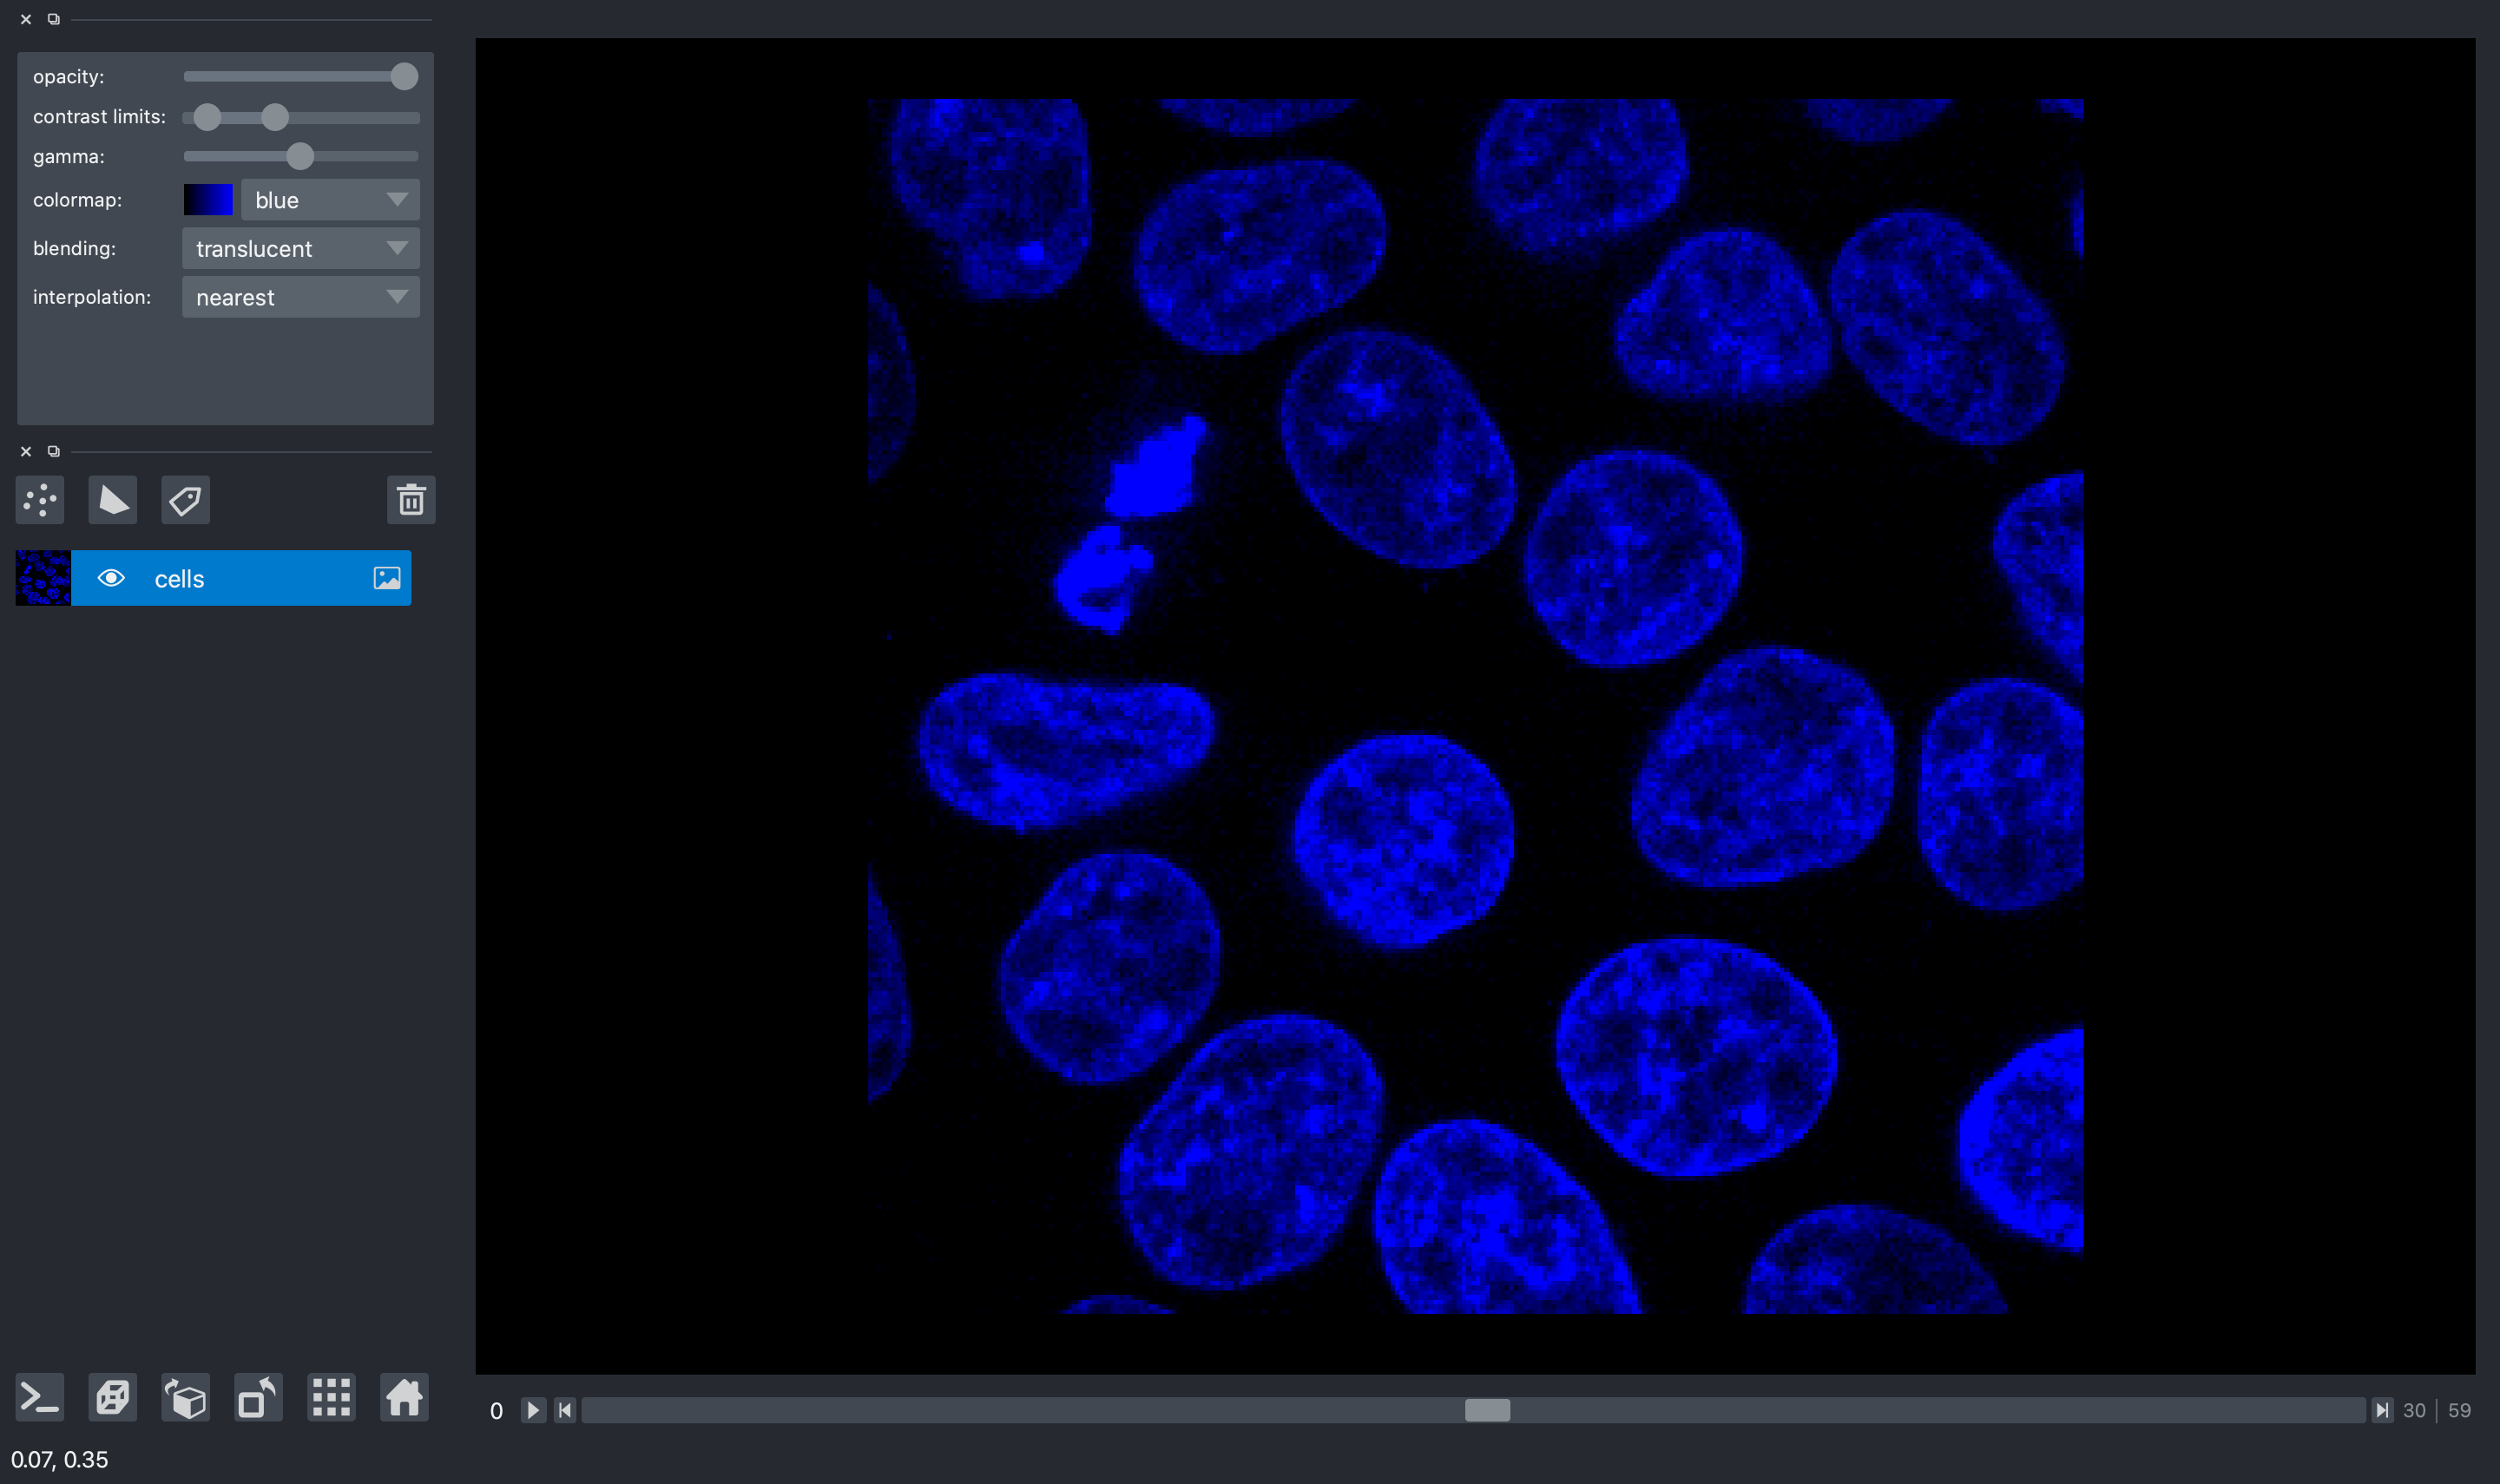

In [20]:
nbscreenshot(viewer)

One of the real strengths of napari is that you have both full GUI control and programatic access to all the critical layer properties.

Each `layer` that is added to the `viewer` can be found in the `viewer.layers` list which can be indexed either numerically or by the layer name, which is visible in the panel in the bottom left of the viewer. This layer has the name `cells`, which was automatically imputed because we originally named the variable we loaded from disk `cells`. Pretty cool!

In [22]:
# let's see what the layers list has in it right now
print(viewer.layers)

[<Image layer 'cells' at 0x61da22510>]


If we go in and get the `cells` layer from our layer list we can now see and edit the values of some of the properties that we can control in the GUI.

In [25]:
# let's look at the values of some of the properties on the `cells` layer
print('Colormap: ', viewer.layers['cells'].colormap)
print('Contrast limits: ', viewer.layers['cells'].contrast_limits)
print('Opacity: ', viewer.layers['cells'].opacity)

Colormap:  ('blue', <vispy.color.colormap.Colormap object at 0x61cee37d0>)
Contrast limits:  [0.07, 0.35]
Opacity:  1.0


In [37]:
# Now let's change some of them. Note that the viewer GUI will update in real time as you run this code in the notebook
viewer.layers['cells'].colormap = 'red'
viewer.layers['cells'].contrast_limits = [0.4, 0.6]
viewer.layers['cells'].opacity = 0.9

# We can even rename the layer, but note that from now on you'll need to refer to if with its new name
viewer.layers['cells'].name = 'bright region'

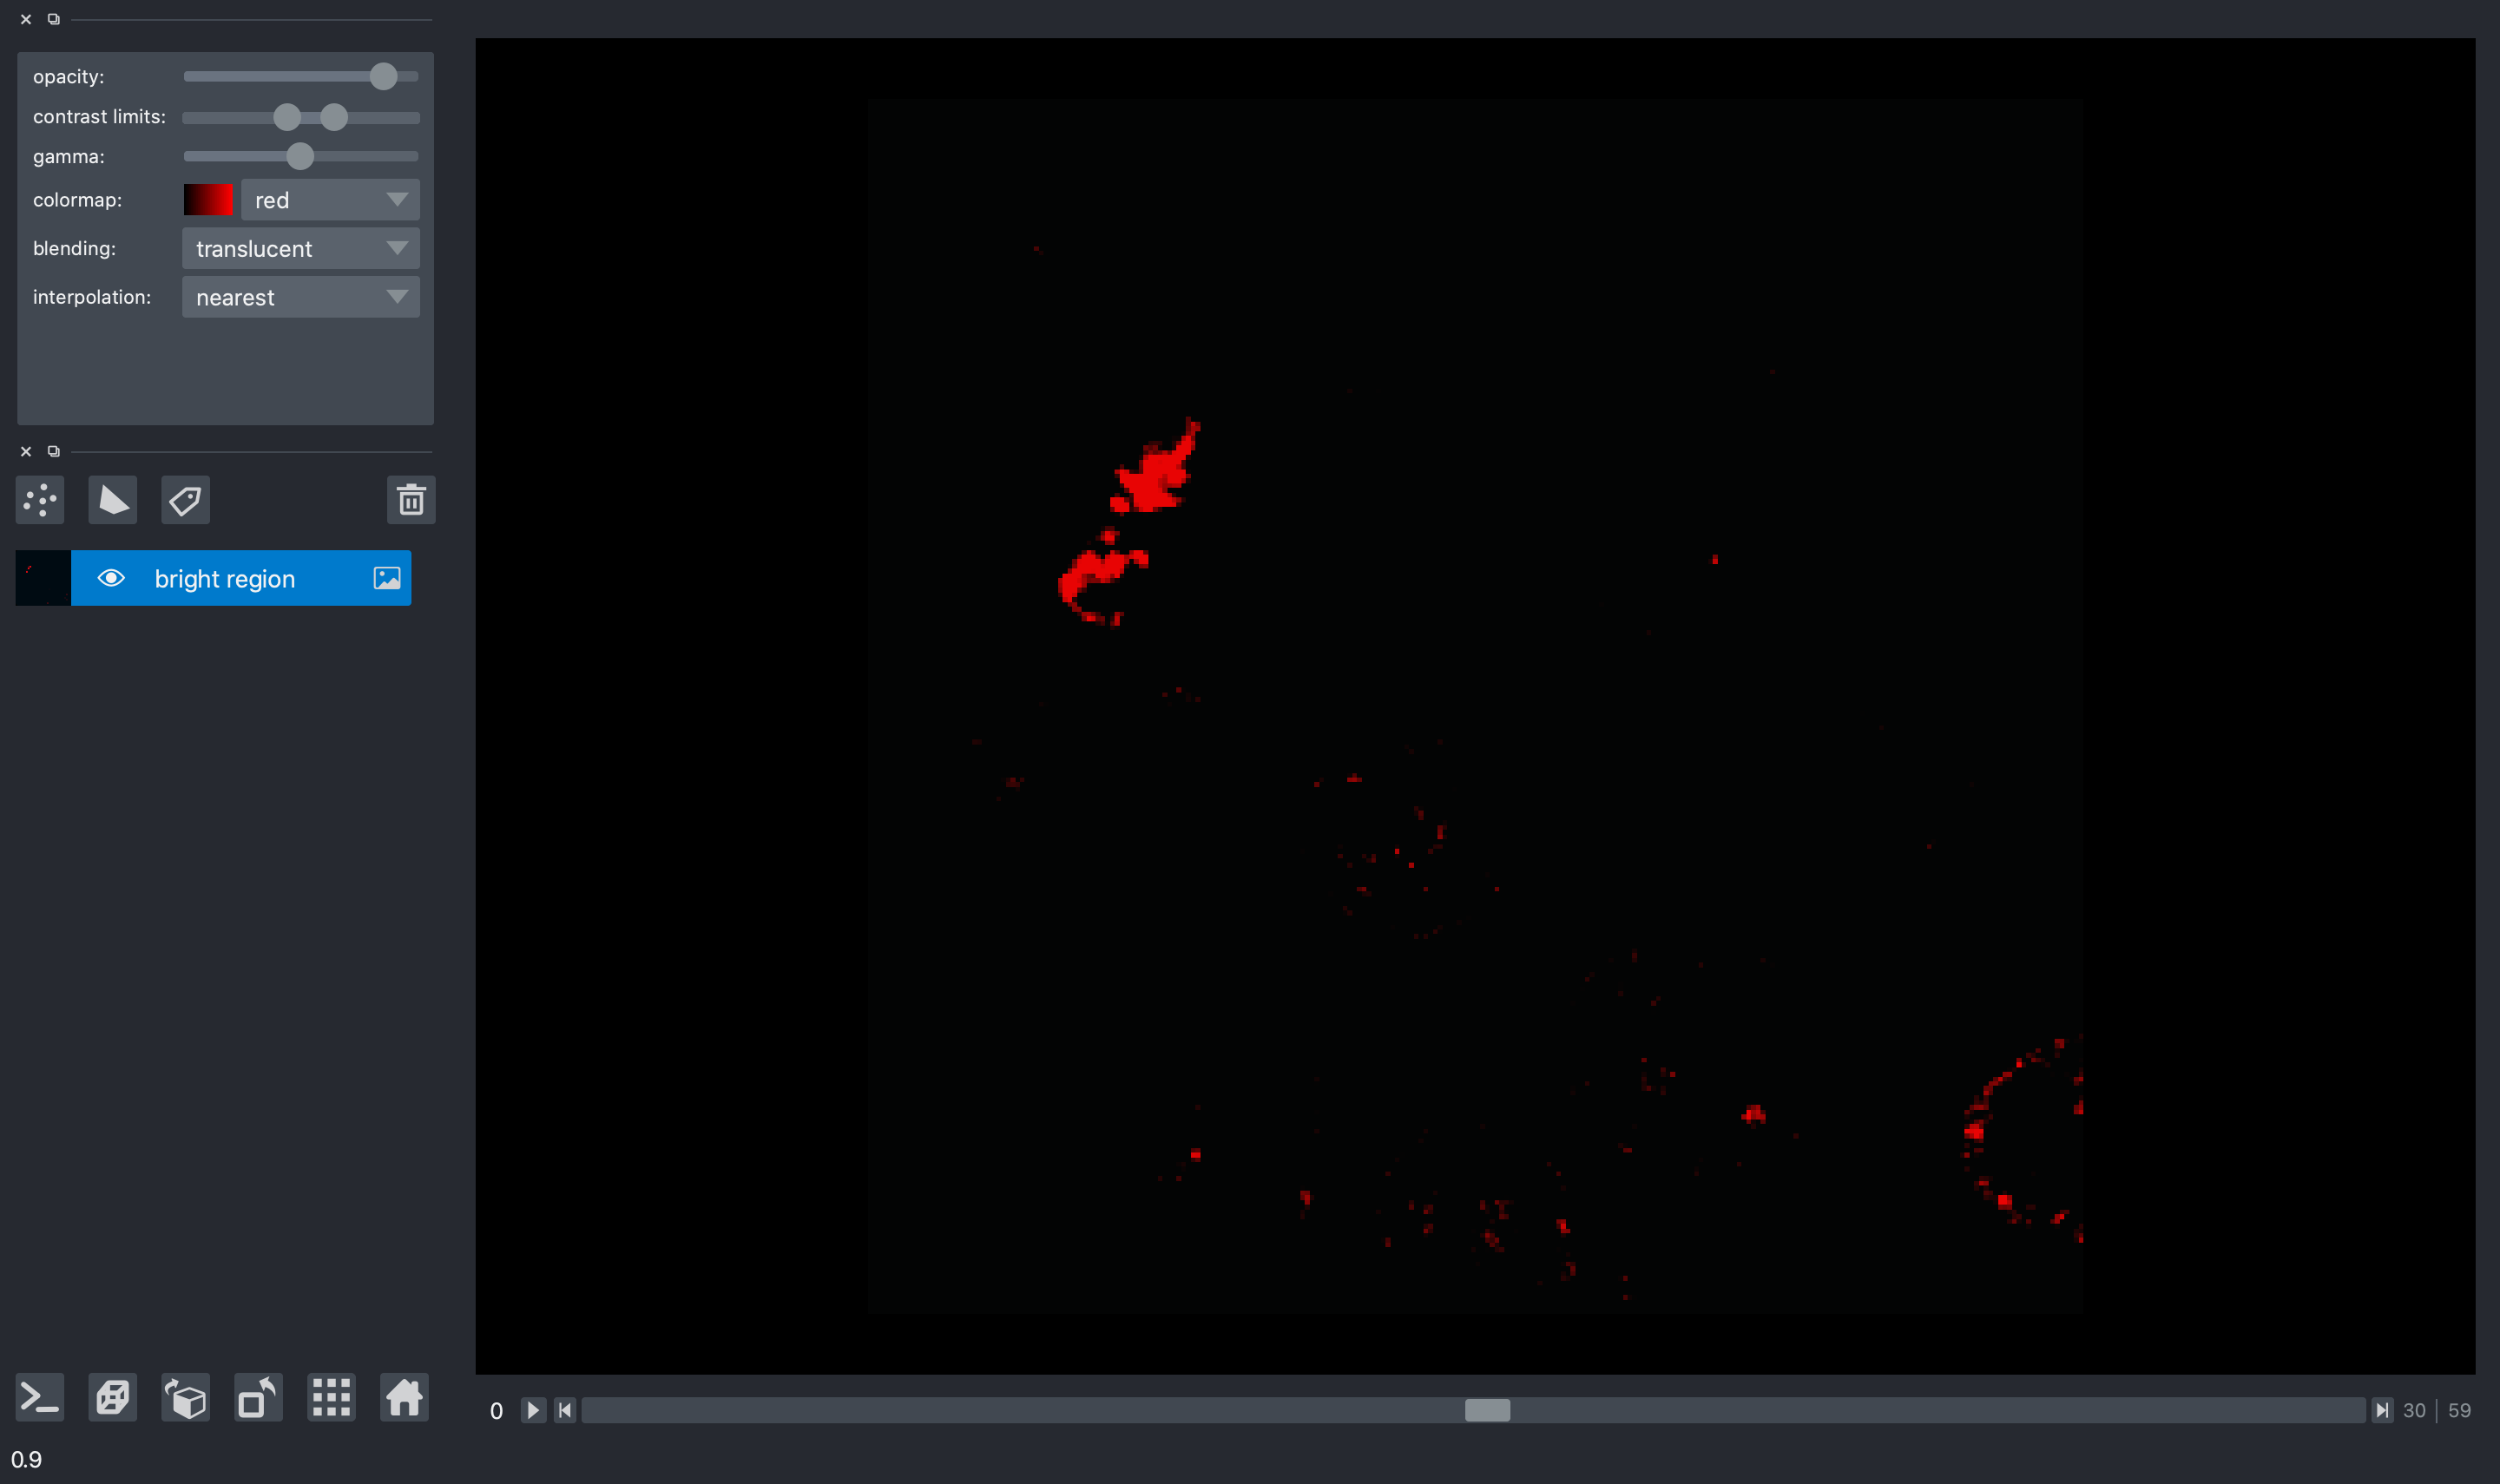

In [38]:
nbscreenshot(viewer)

We could have actually passed these parameters as key-word arguments to during the first `add_image` call. For example we can add another copy of the data as follows:

In [40]:
viewer.add_image(cells, name='background', contrast_limits=[0.07, 0.35], colormap='blue', blending='additive');

Setting the `blending` of the second layer to `additive` now lets us see both together, which could be useful for understanding how parts of the image relate to each other.

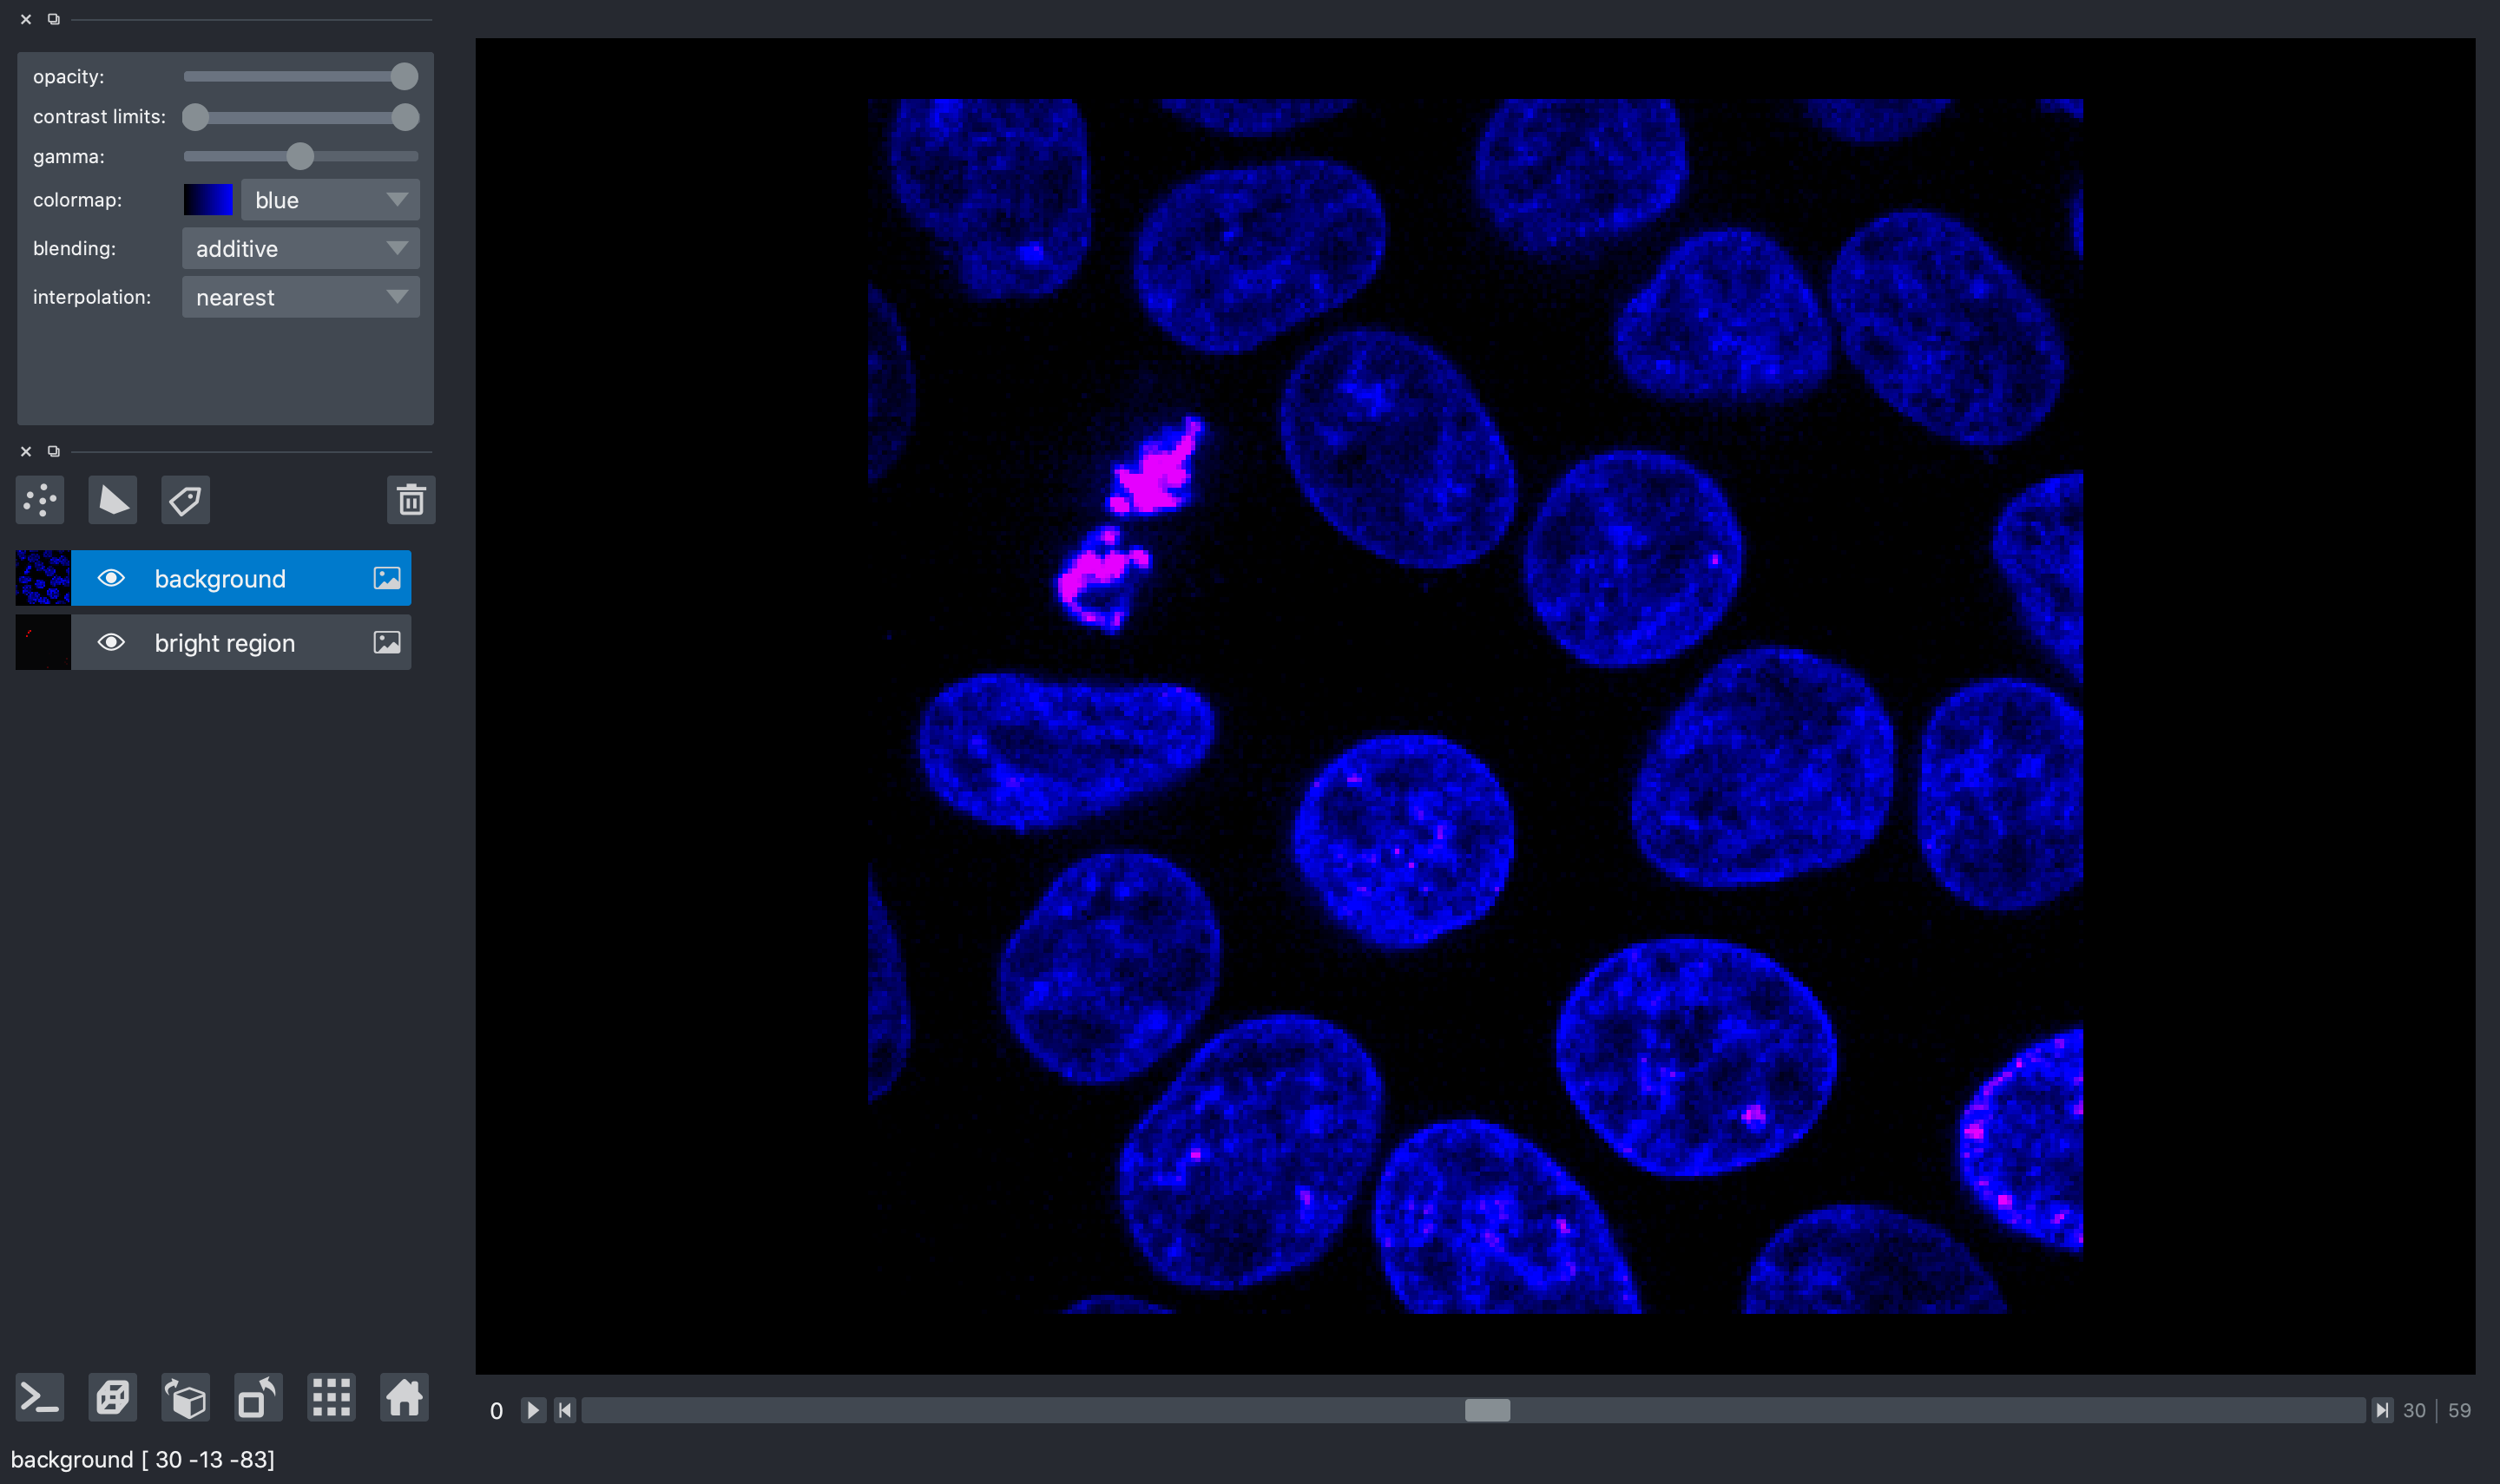

In [41]:
nbscreenshot(viewer)

Note that everything that we've done has automatically been applying in 3D. Use the scroll bar to scroll through to another slice and see what the image looks like. For example the 45th slice looks like:

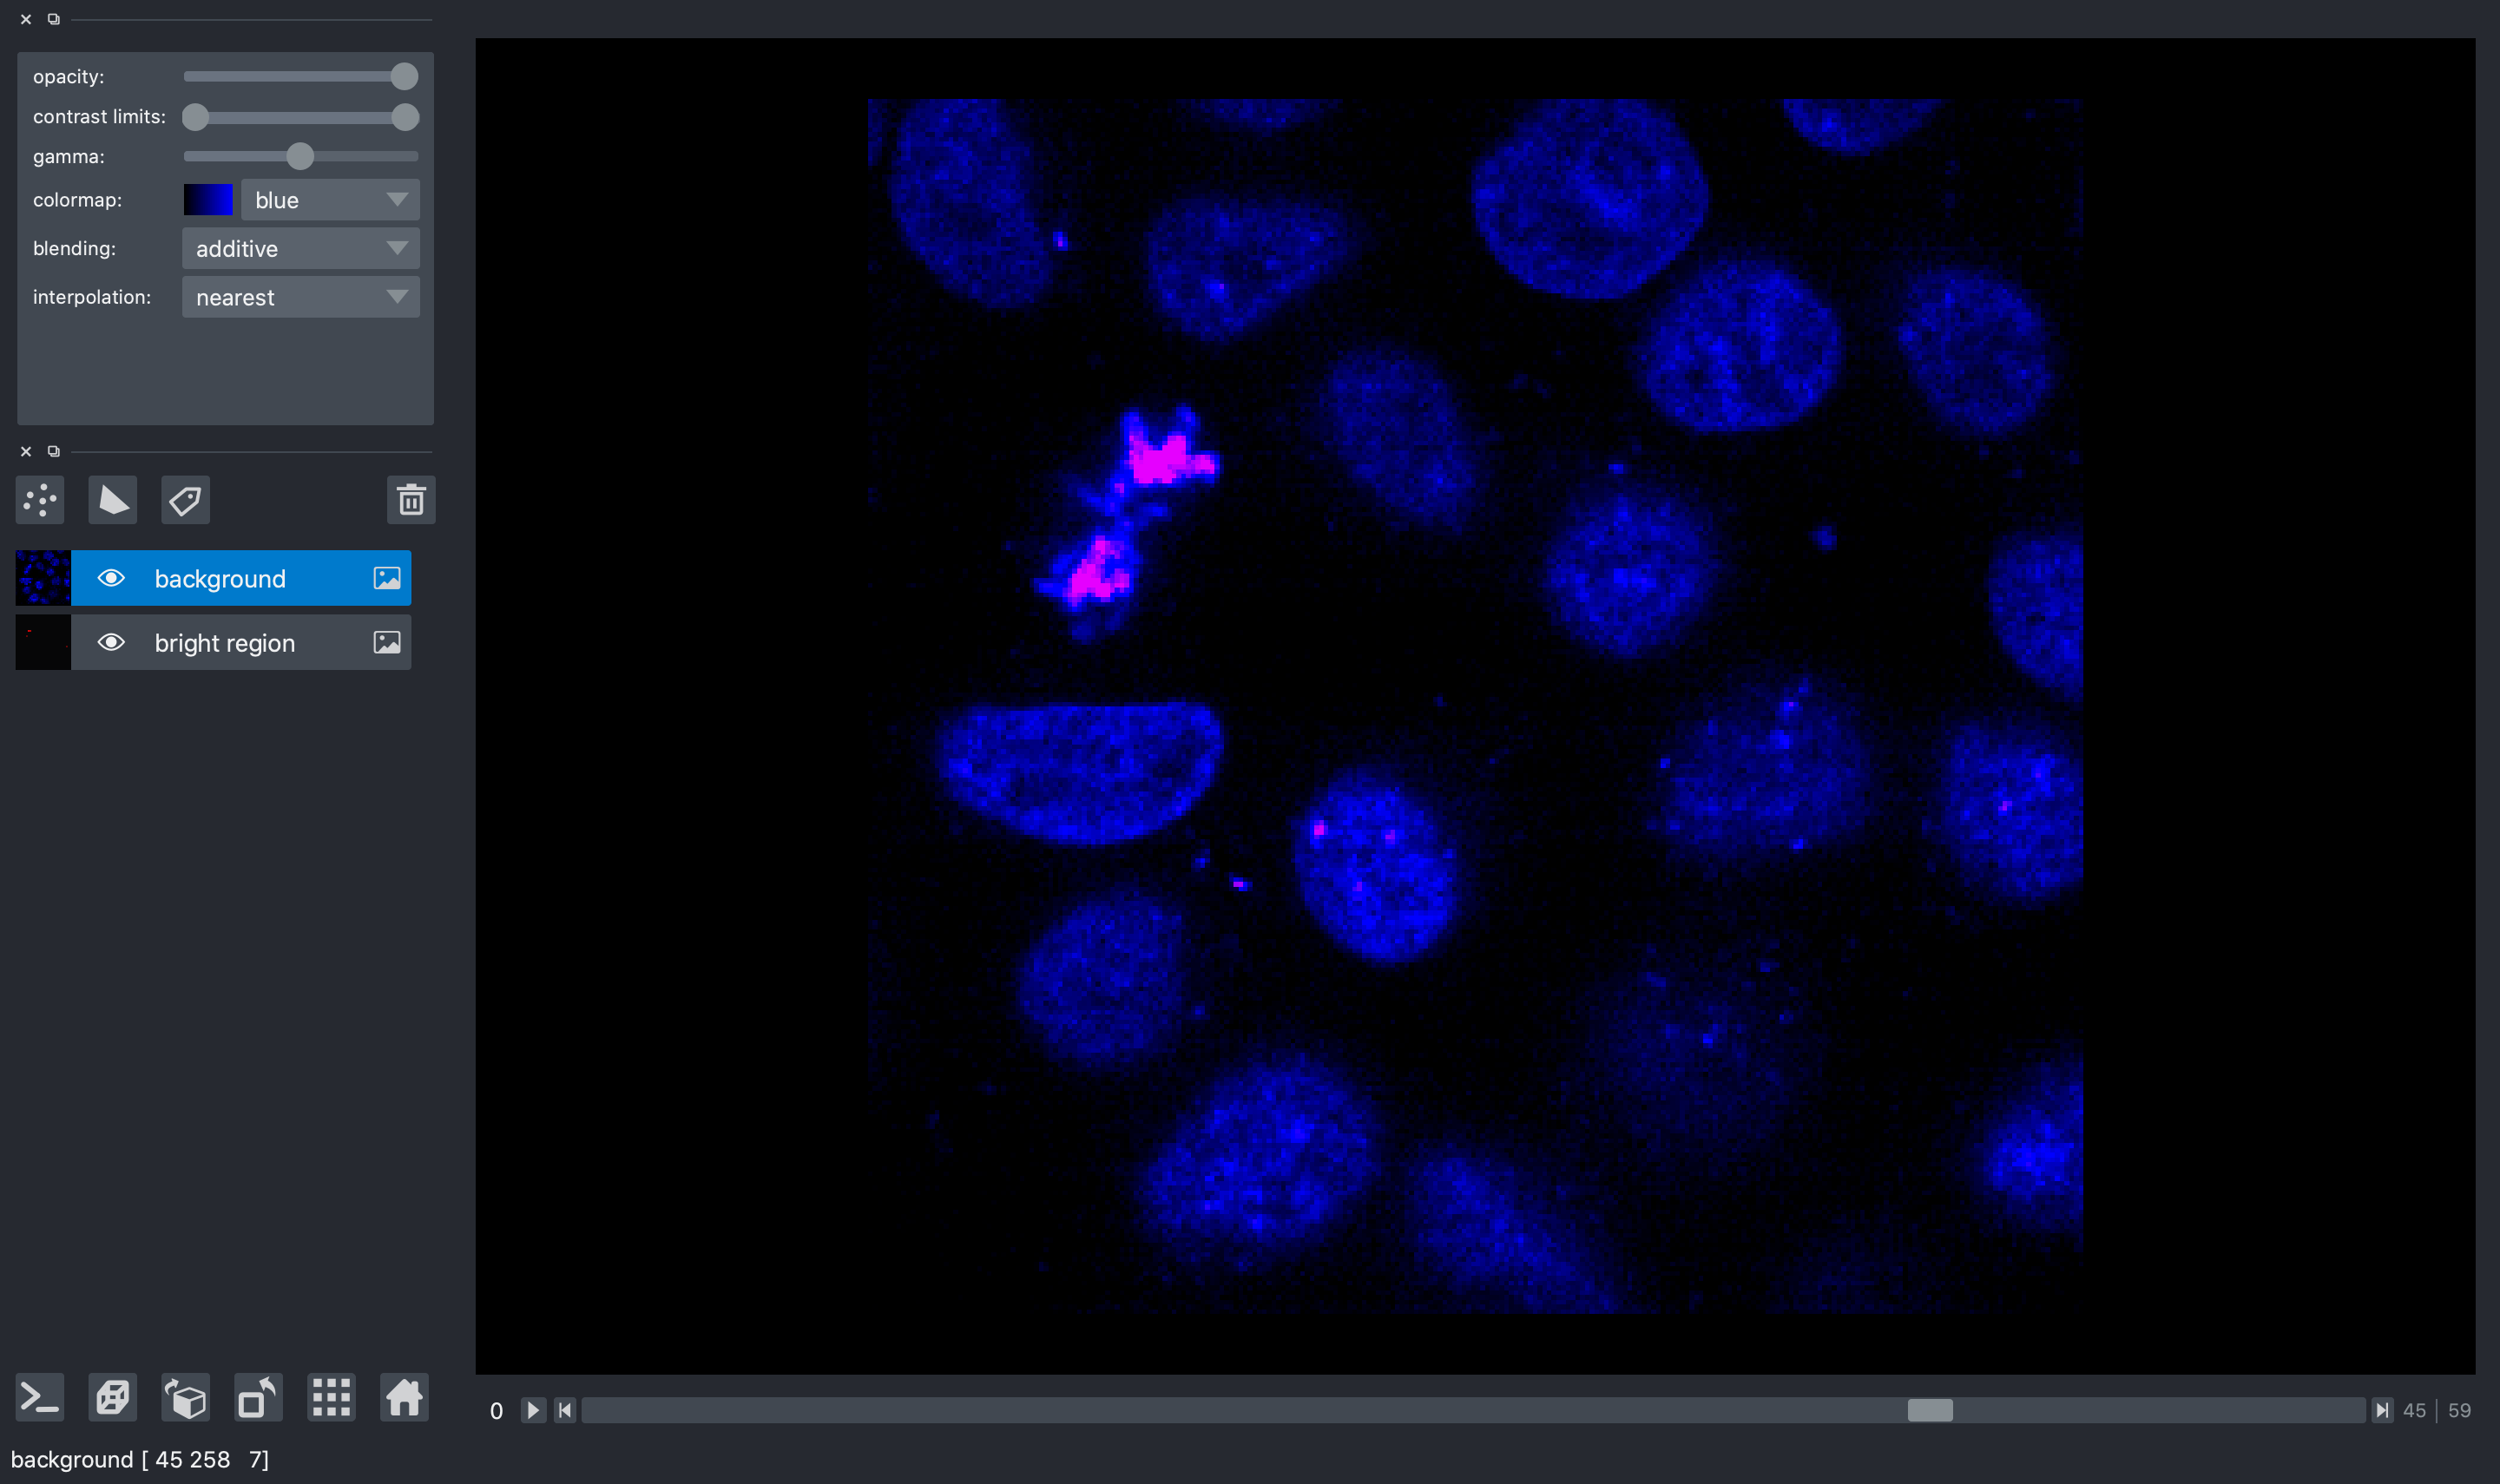

In [42]:
nbscreenshot(viewer)

As this is a 3D volume, we can also use napari to look at different 2D slices, for example clicking the `roll dimensions` button in the bottom left hand corner of the viewer (which looks like a 3D cube with an arrow, 3rd from the left), and then scrolling through to the 60th slice gives the following:

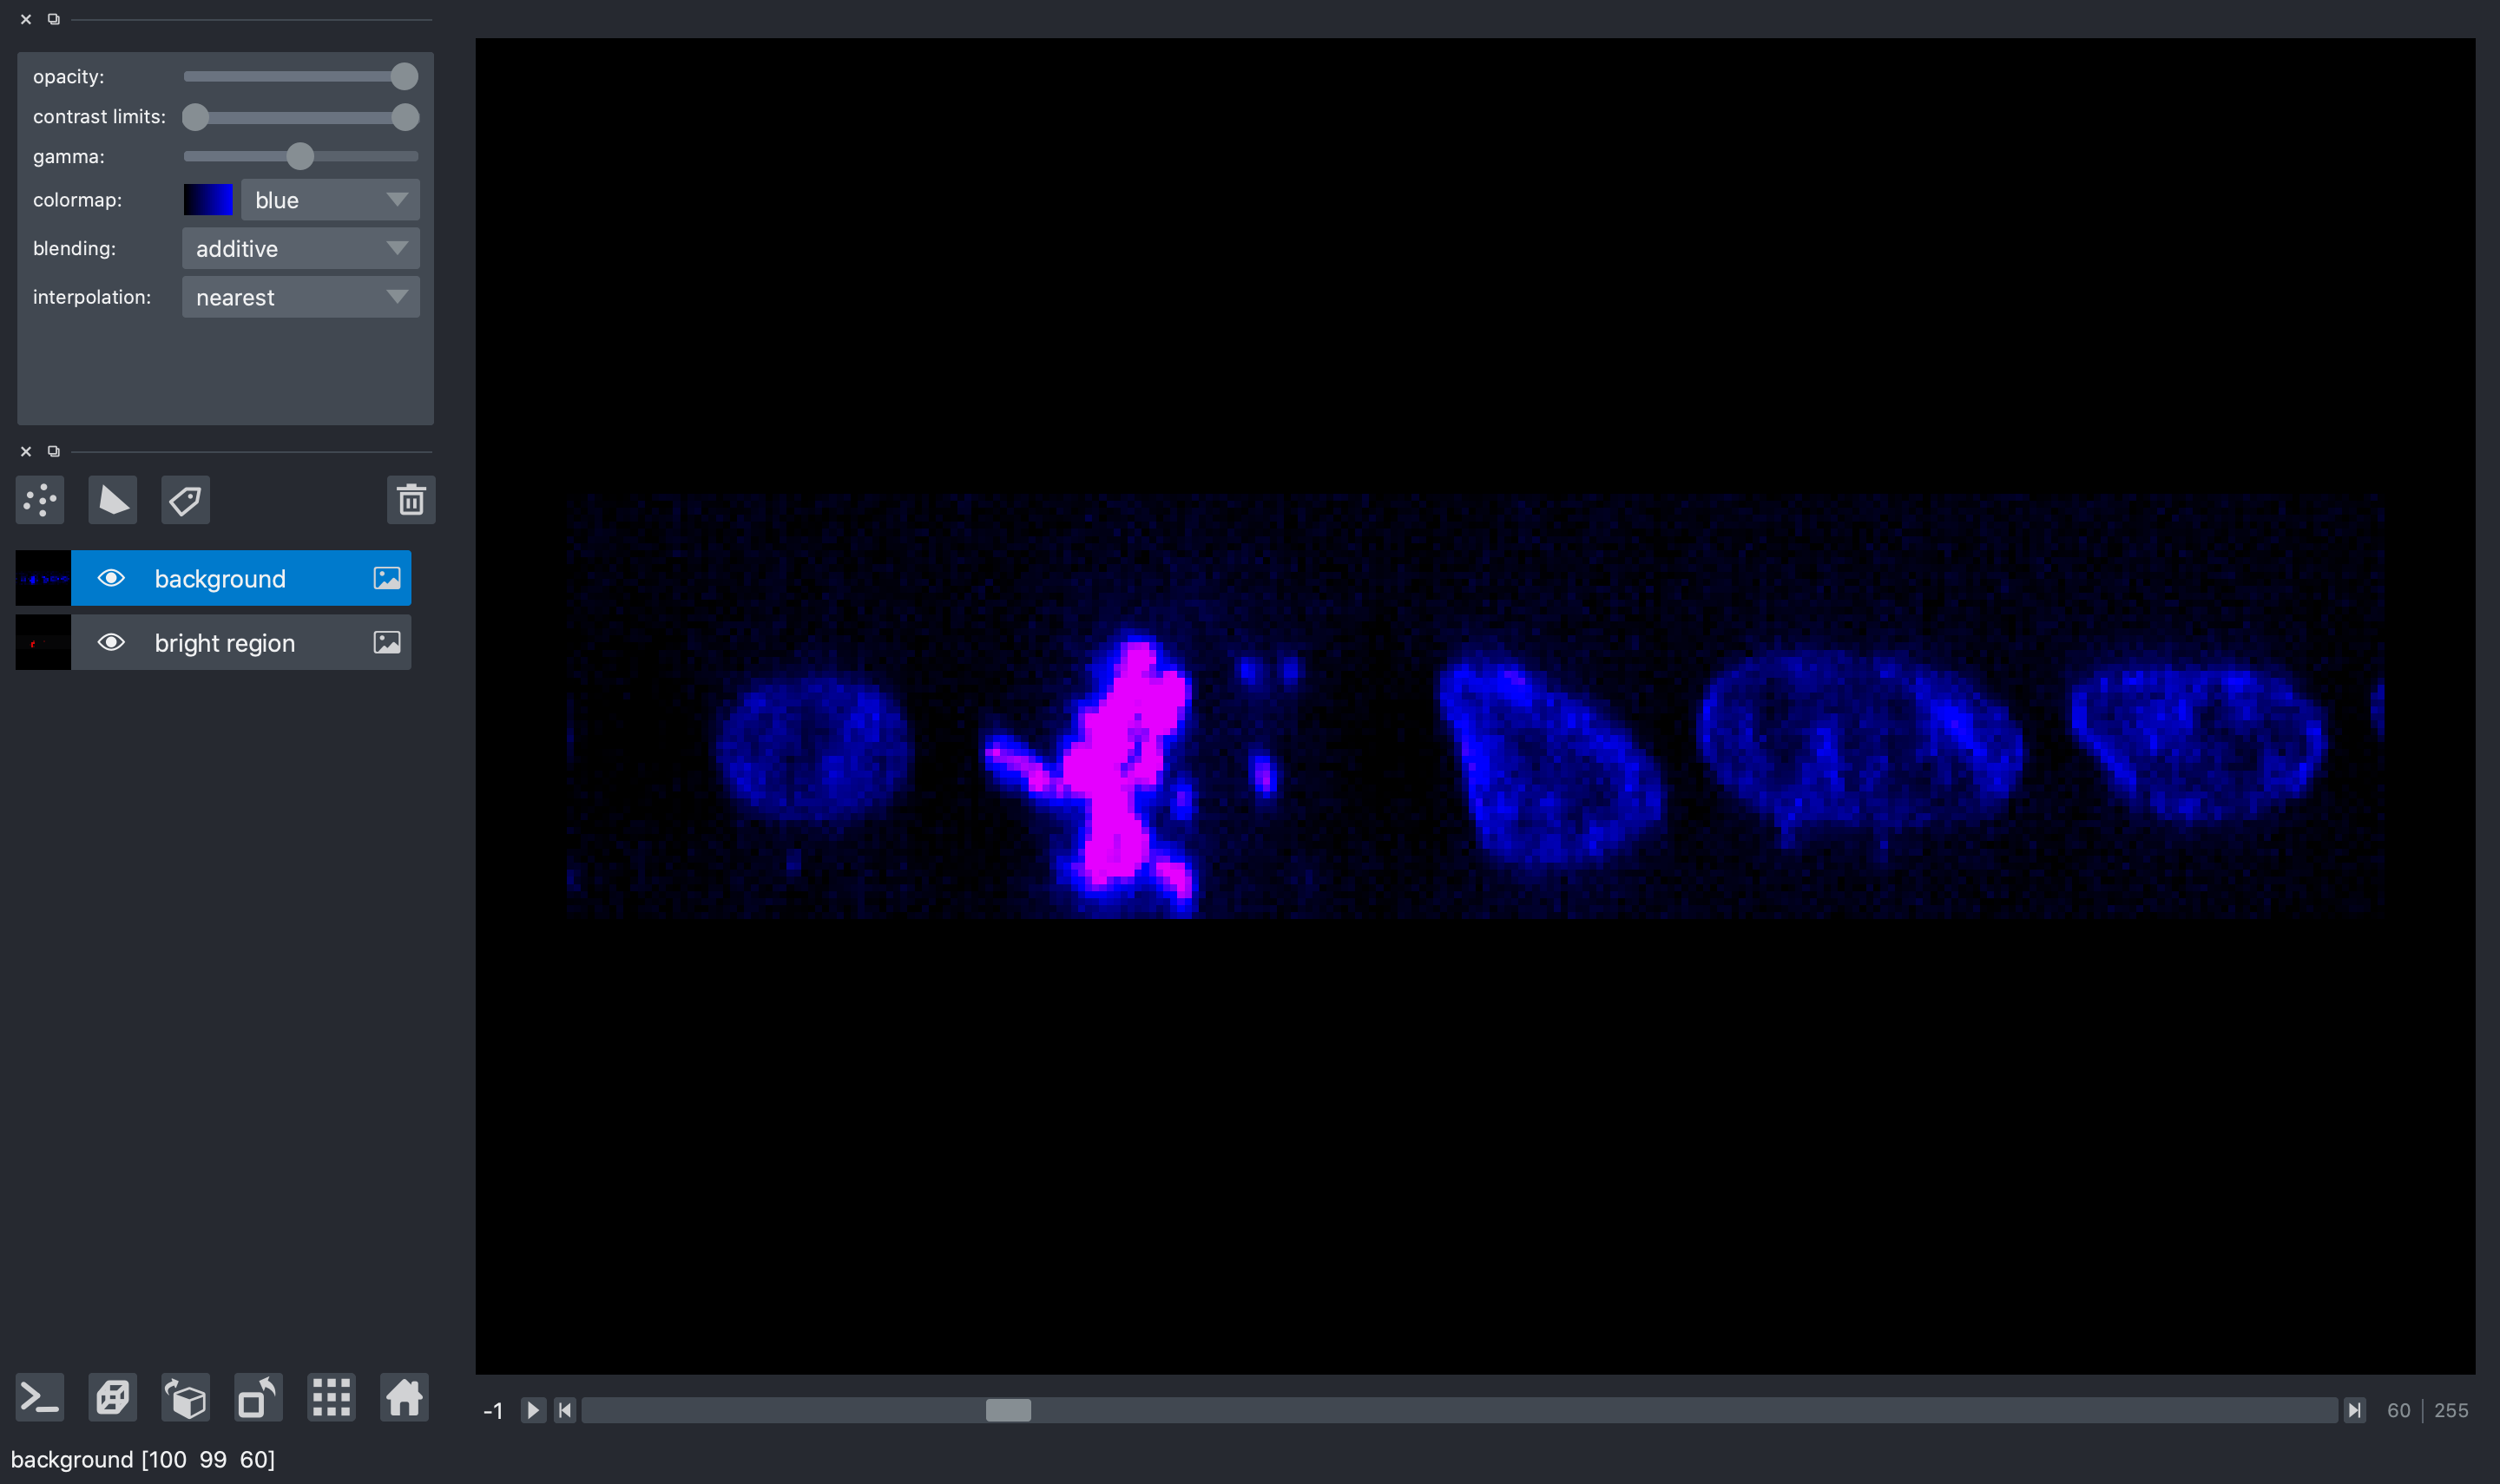

In [43]:
nbscreenshot(viewer)

In addition to doing 2D rendering, napari can also do full 3D rendering. To enable 3D mode click on the 3D rendering button (which looks like a wireframe of a cube, second from the left). Now the slider has disappeared as the full 3D volume is being rendered at the same time. If the original dataset had been 4D, say for a volumteric timeseries then when using 2D rendering we would have initially seen two sliders, one for Z and one for Time, and 3D rendering would have switched us to only seeing one slider, for Time. In this way napari can be used to visualize full n-Dimensional data in either 2D or 3D slices and with multiple color channels.

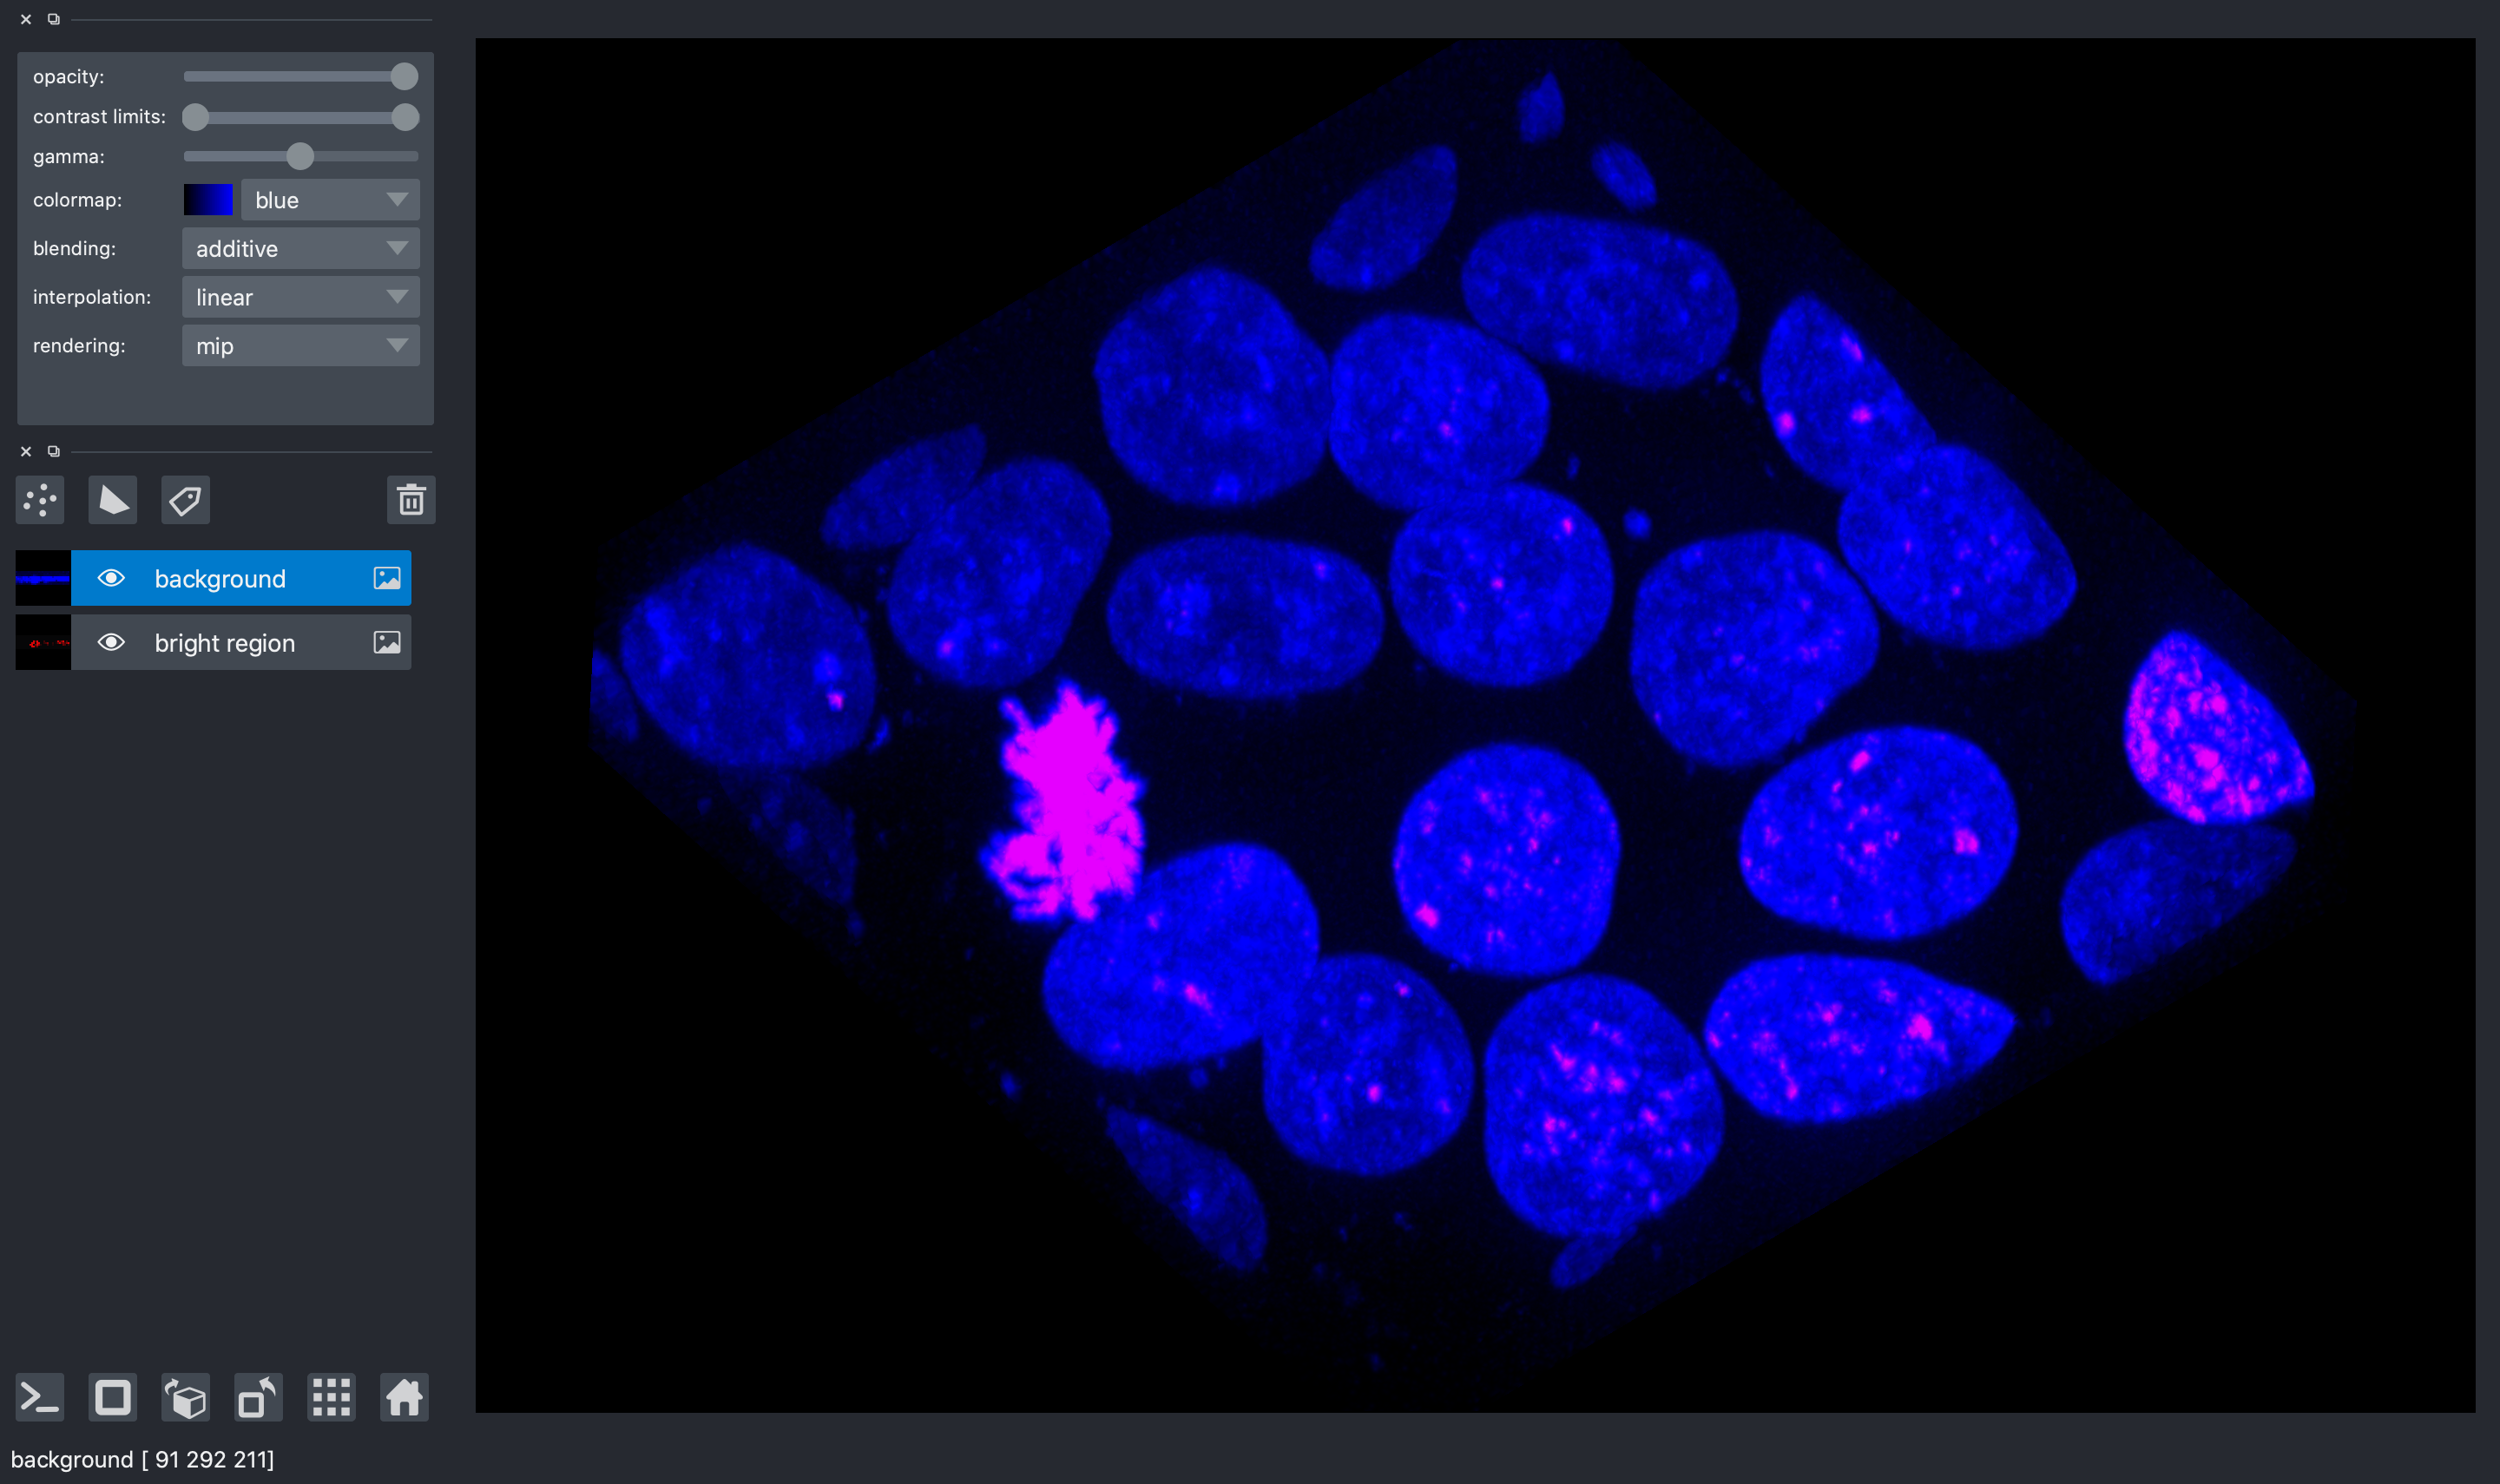

In [44]:
nbscreenshot(viewer)

## Conclusions

We've now seen how to use napari to visualize 3D images, including looking at 2D slices and the full 3D image. We've also learnt how to change properties of an image layer both from the GUI and from the jupyter notebook.

The next lessons will teach us how to create napari layers of other types, perform manual annotations, interactive analyses and more!